<a href="https://colab.research.google.com/github/sakshi-khule/Sakshi_Khule_CyberSecurity/blob/main/Sakshi_Khule_CyberSecurity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103714 entries, 0 to 103713
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     103714 non-null  object
 1   Label   103714 non-null  object
dtypes: object(2)
memory usage: 2.4+ MB
Getting words tokenized ...
Time taken 0.8022642089999863 sec
Getting words stemmed ...
Time taken 6.9595665500000905 sec
Getting joiningwords ...
Time taken 0.04928921699865896 sec
Training Accuracy : 0.9853185061387157
Testing Accuracy : 0.9634386208492421

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.96      0.97      0.97     13762
        Good       0.96      0.96      0.96     12167

    accuracy                           0.96     25929
   macro avg       0.96      0.96      0.96     25929
weighted avg       0.96      0.96      0.96     25929


CONFUSION MATRIX
Training Accuracy : 0.9757279681172463
Testing Accuracy : 0.95179143044467

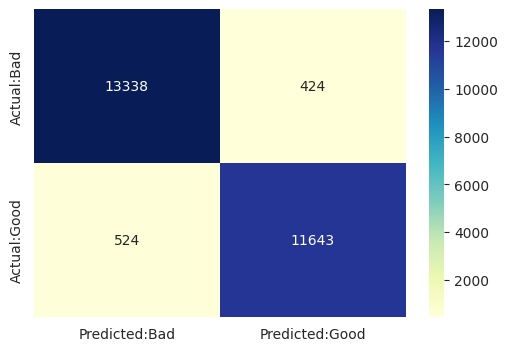

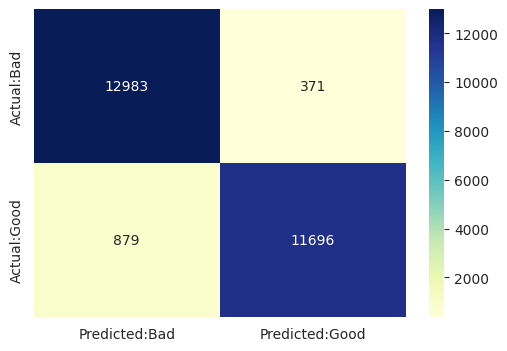

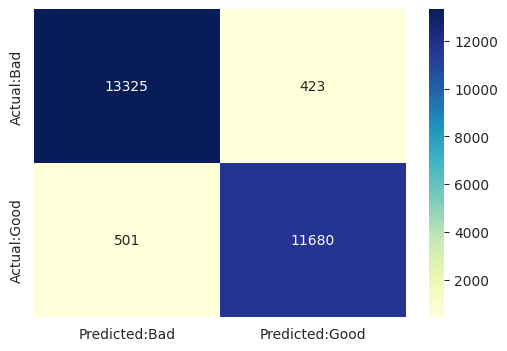

In [ ]:
# Phishing fraud detection model


import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline
# It sets the backend of matplotlib to the 'inline' backend:
import time # calculate time

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
from selenium import webdriver # use for automation chrome
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model

import warnings # ignores pink warnings
warnings.filterwarnings('ignore')

# Loading the dataset
phish_data = pd.read_csv('/content/phishing_site_urls.csv')
phish_data.head()
phish_data.dropna( inplace=True)

phish_data.tail()

phish_data.info()
'''
About dataset
Data is containg 5,49,346 unique entries.
There are two columns.
Label column is prediction col which has 2 categories A. Good - which means the urls is not containing malicious stuff and this site is not a Phishing Site. B. Bad - which means the urls contains malicious stuffs and this site isa Phishing Site.
There is no missing value in the dataset.
'''

phish_data.isnull().sum() # there is no missing values

#Since it is classification problems so let's see the classes are balanced or imbalances

#create a dataframe of classes counts
label_counts = pd.DataFrame(phish_data.Label.value_counts())


tokenizer = RegexpTokenizer(r'[A-Za-z]+')#to getting alpha only
#It is a regular expression tokenizer that spilts the string using regular expression. Here we split only alphabets.


phish_data.URL[0]

#here we are only pulling the strings
# this will be pull letter which matches to expression
tokenizer.tokenize(phish_data.URL[0]) # using first row

# here we are converting the URL into a tokenizer text
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

phish_data.sample(5)

'''
SnowballStemmer
Stemming: It is the process of reducing the word to its word stem that affixes to suffixes and prefixes or to roots of words known as a lemma.
In simple words stemming is reducing a word to its base word or stem in such a way that the words of similar kind lie under a common stem.
It is used in NLP
'''

stemmer = SnowballStemmer("english") # choose a language
# This will combine the root words or those words that are repeated or are commonly used so far.
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

phish_data.sample(5)


print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

phish_data.sample(5)

#Here we join all the words in lists and combine it in one set to make the data clean.


#sliceing classes
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']
bad_sites.head()

good_sites.head()

#create a function to visualize the important keys from url

#create cv object
#Count Vectorizer is used to transform a given text into a vector on the basis of the frequency (count)
# of each word that occurs in the entire text.
cv = CountVectorizer()


feature = cv.fit_transform(phish_data.text_sent) #transform all text which we tokenize and stemed
#It converts the phish_data into space matrix.
feature[:5].toarray() # convert sparse matrix into array to print transformed features
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

#Here we split the data in training and testing model


#Logistic Regression
#Logistic regression is a statistical method used for making predictions or decisions based on data.
#It's often used when we want to understand the relationship between one or more independent variables
 #(like age, income, or temperature) and a binary outcome (like yes/no, 1/0, or true/false).
lr = LogisticRegression()
lr.fit(trainX,trainY)

lr.score(testX,testY)
# The score we are getting by this model is 0.954

Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
#We are printing the scores of the training and testing model here
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])
#We create this confusion matrix to see the actual and predicted values

print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

#Here classification report is created

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

'''
We use Multinomial Naive Bayes here because the accuracy by just logistic regression is just 95%. Hence, we use it
in order to enhance the accuracy.
 create mnb object
Multinomial Naive Bayes (MNB) is a popular machine learning algorithm for text classification problems
in Natural Language Processing (NLP). It is particularly useful for problems that involve text data
with discrete features such as word frequency counts.
'''
mnb = MultinomialNB()

mnb.fit(trainX,trainY)
mnb.score(testX,testY)
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])
#Same procedure like above is followed here.

print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")


acc = pd.DataFrame.from_dict(Scores_ml,orient = 'index',columns=['Accuracy'])
sns.set_style('darkgrid')


pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())
##(r'\b(?:http|ftp)s?://\S*\w|\w+|[^\w\s]+') ([a-zA-Z]+)([0-9]+)  -- these tolenizers giving me low accuray

trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)
'''
A pipeline is a process that drives software development through a path of building, testing, and
deploying code, also known as CI/CD. By automating the process, the objective is to minimize human error
and maintain a consistent process for how software is released.
'''
pipeline_ls.fit(trainX,trainY)

pipeline_ls.score(testX,testY)


print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")


#Python pickle module is used for serializing and de-serializing a Python object structure
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))


loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

'''
Here list of URLs is given and the model signifies the good and bad URLs
'''
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)